# CS640 Homework 6 - Neural Networks

In this assignment, you will

1. derive both forward and backward propagation,
2. implement a neural network from scratch, and
3. run experiments with your model.

## Instructions

### General Instructions
In an ipython notebook, to run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]`(like "play") button above. To edit any code or text cell (double) click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Most of the written questions are followed up a cell for you enter your answers. Please enter your answers in a new line below the **Answer** mark. If you do not see such cell, please insert one by yourself. Your answers and the questions should **not** be in the same cell.

### Instructions on Math
Some questions require you to enter math expressions. To enter your solutions, put down your derivations into the corresponding cells below using LaTeX. Show all steps when proving statements. If you are not familiar with LaTeX, you should look at some tutorials and at the examples listed below between \$..\$. The [OEIS website](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols) can also be helpful.

Alternatively, you can scan your work from paper and insert the image(s) in a text cell.


## Q1: Written Problems

Consider a simple neural network with three layers: an input layer, a hidden layer, and an output layer.

Let $w^{(1)}$ and $w^{(2)}$ be the layers' weight matrices and let $b^{(1)}$ and $b^{(2)}$ be their biases. For convention, suppose that $w_{ij}$ is the weight between the $i$th node in the previous layer and the $j$th node in the current one.

Additionally, the activation function for both layers is the sigmoid function $\sigma(x) = \frac{1}{1 + e^{-x}}$. Let $z^{(1)}$ and $z^{(2)}$ be the outputs of the two layers before activation, and let $a^{(1)} = \sigma(z^{(1)})$ and $a^{(2)} = \sigma(z^{(2)})$.

Lastly, we choose the L2 loss $L(y_{\text{true}}, y_{\text{predict}}) = \frac{1}{2}(y_{\text{true}} - y_{\text{predict}})^{2}$ as the loss function.


### Q1.1: Forward Pass
Suppose that

$w^{(1)} = \begin{bmatrix}0.4 & 0.6 & 0.2 \\ 0.3 & 0.9 & 0.5\end{bmatrix}$,
 $b^{(1)} = [1, 1, 1]$; and

$w^{(2)} = \begin{bmatrix}0.2 \\ 0.2 \\ 0.8\end{bmatrix}$, $b^{(2)} = [0.5]$.

If the input is $a^{(0)} = \begin{bmatrix}1 \\ 1\end{bmatrix}$, what is the network output? Show your calculation steps and round your **final** answer to 2 digits after decimal.

**Note**: You should NOT round any intermediate results.


**[Answer]**

Given:
$w^{(1)} = \begin{bmatrix}0.4 & 0.6 & 0.2 \\ 0.3 & 0.9 & 0.5\end{bmatrix}$, $b^{(1)} = [1, 1, 1]$;
$w^{(2)} = \begin{bmatrix}0.2 \\ 0.2 \\ 0.8\end{bmatrix}$, $b^{(2)} = [0.5]$;
$a^{(0)} = \begin{bmatrix}1 \\ 1\end{bmatrix}$

**Step 1: Calculate the weighted input to the hidden layer ($z^{(1)}$)**

$z^{(1)} = (a^{(0)})^T w^{(1)} + b^{(1)}$

$z^{(1)} = \begin{bmatrix}1 & 1\end{bmatrix} \begin{bmatrix}0.4 & 0.6 & 0.2 \\ 0.3 & 0.9 & 0.5\end{bmatrix} + \begin{bmatrix}1 & 1 & 1\end{bmatrix}$

$z^{(1)} = \begin{bmatrix}(1 \cdot 0.4 + 1 \cdot 0.3) & (1 \cdot 0.6 + 1 \cdot 0.9) & (1 \cdot 0.2 + 1 \cdot 0.5)\end{bmatrix} + \begin{bmatrix}1 & 1 & 1\end{bmatrix}$

$z^{(1)} = \begin{bmatrix}0.7 & 1.5 & 0.7\end{bmatrix} + \begin{bmatrix}1 & 1 & 1\end{bmatrix}$

$z^{(1)} = \begin{bmatrix}1.7 & 2.5 & 1.7\end{bmatrix}$

**Step 2: Apply the sigmoid activation function to the hidden layer output ($a^{(1)}$)**

$a^{(1)} = \sigma(z^{(1)})$

$a^{(1)} = \begin{bmatrix}\sigma(1.7) & \sigma(2.5) & \sigma(1.7)\end{bmatrix}$

$\sigma(x) = \frac{1}{1 + e^{-x}}$

$\sigma(1.7) = \frac{1}{1 + e^{-1.7}} \approx \frac{1}{1 + 0.1827} \approx \frac{1}{1.1827} \approx 0.8455$

$\sigma(2.5) = \frac{1}{1 + e^{-2.5}} \approx \frac{1}{1 + 0.0821} \approx \frac{1}{1.0821} \approx 0.9241$

$a^{(1)} \approx \begin{bmatrix}0.8455 & 0.9241 & 0.8455\end{bmatrix}$

**Step 3: Calculate the weighted input to the output layer ($z^{(2)}$)**

$z^{(2)} = a^{(1)} w^{(2)} + b^{(2)}$

$z^{(2)} = \begin{bmatrix}0.8455 & 0.9241 & 0.8455\end{bmatrix} \begin{bmatrix}0.2 \\ 0.2 \\ 0.8\end{bmatrix} + \begin{bmatrix}0.5\end{bmatrix}$

$z^{(2)} = [(0.8455 \cdot 0.2) + (0.9241 \cdot 0.2) + (0.8455 \cdot 0.8)] + [0.5]$

$z^{(2)} = [0.1691 + 0.1848 + 0.6764] + [0.5]$

$z^{(2)} = [1.0303] + [0.5]$

$z^{(2)} = [1.5303]$

**Step 4: Apply the sigmoid activation function to the output layer output ($a^{(2)}$)**

$a^{(2)} = \sigma(z^{(2)})$

$a^{(2)} = \sigma(1.5303)$

$a^{(2)} = \frac{1}{1 + e^{-1.5303}} \approx \frac{1}{1 + 0.2165} \approx \frac{1}{1.2165} \approx 0.8220$

**Final Answer (rounded to 2 digits):**

The network output is approximately $0.82$.

### Q1.2: Backward Propagation

Derive the expressions of the following gradients:
1. $\frac{\partial L}{\partial w^{(2)}}$ and $\frac{\partial L}{\partial b^{(2)}}$
2. $\frac{\partial L}{\partial w^{(1)}}$ and $\frac{\partial L}{\partial b^{(1)}}$

For each gradient, start by deriving the element-level expression using chain rule, and then construct the final answer in matrix form. You can use a self-defined variable(e.g., $\eta$) to shorten a long expression (especially for the first-layer gradients).

An example of your answer should look like the following.


---


(Element level)
\begin{align}
    \frac{\partial L}{\partial w^{(2)}_{i}} &= \frac{\partial L}{\partial a^{(2)}} \cdot \frac{\partial a^{(2)}}{\partial z^{(2)}} \cdot \frac{\partial z^{(2)}}{\partial w^{(2)}_{i}} \text{  (chain rule)}\\
    &= L'(y_{\text{true}}, a^{(2)}) \cdot f'_{2}(z^{(2)}) \cdot a^{(1)}_{i} \text{  (substitution)}\\
    &= ... \text{  (further substitution and/or simplification if needed)}
\end{align}

(Matrix form)

$$\frac{\partial L}{\partial w^{(2)}} = ... \text{  (only the final answer is needed)}$$


---



**Note**: The derivative of $\sigma(x)$ is $\sigma(x)(1 - \sigma(x))$ if $x$ is a scalar, or $\sigma(x)\odot(1 - \sigma(x))$ if $x$ is a vector.

**[Answer]**

Let $L$ be the L2 loss, $a^{(2)}$ be the network output, $z^{(2)}$ be the weighted input to the output layer, $a^{(1)}$ be the output of the hidden layer, $z^{(1)}$ be the weighted input to the hidden layer, $a^{(0)}$ be the network input, $w^{(2)}$ and $b^{(2)}$ be the weights and bias of the output layer, and $w^{(1)}$ and $b^{(1)}$ be the weights and bias of the hidden layer. The activation function is $\sigma(x)$.

The loss function is $L = \frac{1}{2}(y_{\text{true}} - a^{(2)})^{2}$.
The derivative of the loss with respect to $a^{(2)}$ is $\frac{\partial L}{\partial a^{(2)}} = -(y_{\text{true}} - a^{(2)})$.

The output layer calculation is $a^{(2)} = \sigma(z^{(2)})$, where $z^{(2)} = a^{(1)} w^{(2)} + b^{(2)}$.
The derivative of the sigmoid function is $\sigma'(x) = \sigma(x)(1 - \sigma(x))$.

The hidden layer calculation is $a^{(1)} = \sigma(z^{(1)})$, where $z^{(1)} = (a^{(0)})^T w^{(1)} + b^{(1)}$.

**1. Gradients for the output layer ($w^{(2)}$ and $b^{(2)}$)**

(Element level for $w^{(2)}$)
\begin{align}
\frac{\partial L}{\partial w^{(2)}_{ij}} &= \frac{\partial L}{\partial a^{(2)}_{j}} \cdot \frac{\partial a^{(2)}_{j}}{\partial z^{(2)}_{j}} \cdot \frac{\partial z^{(2)}_{j}}{\partial w^{(2)}_{ij}} \text{  (chain rule)}\\
&= -(y_{\text{true}, j} - a^{(2)}_{j}) \cdot \sigma'(z^{(2)}_{j}) \cdot a^{(1)}_{i} \text{  (substitution)}
\end{align}

Let $\delta^{(2)}_j = \frac{\partial L}{\partial z^{(2)}_j} = \frac{\partial L}{\partial a^{(2)}_j} \cdot \frac{\partial a^{(2)}_j}{\partial z^{(2)}_j} = -(y_{\text{true}, j} - a^{(2)}_{j}) \cdot \sigma'(z^{(2)}_{j})$.

(Matrix form for $w^{(2)}$)
$$ \frac{\partial L}{\partial w^{(2)}} = (a^{(1)})^T \delta^{(2)} $$
where $\delta^{(2)} = -(y_{\text{true}} - a^{(2)}) \odot \sigma'(z^{(2)})$.

(Element level for $b^{(2)}$)
\begin{align}
\frac{\partial L}{\partial b^{(2)}_{j}} &= \frac{\partial L}{\partial a^{(2)}_{j}} \cdot \frac{\partial a^{(2)}_{j}}{\partial z^{(2)}_{j}} \cdot \frac{\partial z^{(2)}_{j}}{\partial b^{(2)}_{j}} \text{  (chain rule)}\\
&= -(y_{\text{true}, j} - a^{(2)}_{j}) \cdot \sigma'(z^{(2)}_{j}) \cdot 1 \text{  (substitution)}\\
&= \delta^{(2)}_j
\end{align}

(Matrix form for $b^{(2)}$)
$$ \frac{\partial L}{\partial b^{(2)}} = \delta^{(2)} $$

**2. Gradients for the hidden layer ($w^{(1)}$ and $b^{(1)}$)**

(Element level for $w^{(1)}$)
\begin{align}
\frac{\partial L}{\partial w^{(1)}_{ij}} &= \sum_k \frac{\partial L}{\partial z^{(2)}_k} \cdot \frac{\partial z^{(2)}_k}{\partial a^{(1)}_j} \cdot \frac{\partial a^{(1)}_j}{\partial z^{(1)}_j} \cdot \frac{\partial z^{(1)}_j}{\partial w^{(1)}_{ij}} \text{  (chain rule)}\\
&= \sum_k \delta^{(2)}_k \cdot w^{(2)}_{jk} \cdot \sigma'(z^{(1)}_{j}) \cdot a^{(0)}_{i} \text{  (substitution)}
\end{align}

Let $\delta^{(1)}_j = \frac{\partial L}{\partial z^{(1)}_j} = \sum_k \delta^{(2)}_k \cdot w^{(2)}_{jk} \cdot \sigma'(z^{(1)}_{j}) = (\delta^{(2)} (w^{(2)})^T)_j \cdot \sigma'(z^{(1)}_{j})$.

(Matrix form for $w^{(1)}$)
$$ \frac{\partial L}{\partial w^{(1)}} = (a^{(0)})^T \delta^{(1)} $$
where $\delta^{(1)} = (\delta^{(2)} (w^{(2)})^T) \odot \sigma'(z^{(1)})$.

(Element level for $b^{(1)}$)
\begin{align}
\frac{\partial L}{\partial b^{(1)}_{j}} &= \sum_k \frac{\partial L}{\partial z^{(2)}_k} \cdot \frac{\partial z^{(2)}_k}{\partial a^{(1)}_j} \cdot \frac{\partial a^{(1)}_j}{\partial z^{(1)}_j} \cdot \frac{\partial z^{(1)}_j}{\partial b^{(1)}_{j}} \text{  (chain rule)}\\
&= \sum_k \delta^{(2)}_k \cdot w^{(2)}_{jk} \cdot \sigma'(z^{(1)}_{j}) \cdot 1 \text{  (substitution)}\\
&= \delta^{(1)}_j
\end{align}

(Matrix form for $b^{(1)}$)
$$ \frac{\partial L}{\partial b^{(1)}} = \delta^{(1)} $$

## Q2: Implementation

In this part, you need to construct a neural network model and run a test experiment. We provide a skeleton script of for the model and full script for the test experiment.

### Q2.0: Import Packages

The packages imported in the following block should be sufficient for this problem, but you are free to add more if necessary. However, keep in mind that you **should not** import and use any neural network package. If you have concern about an addition package, please contact us via Piazza.

In [1]:
import numpy as np
import os, sys

### Q2.1: Define Activation and Loss Functions

Complete the following functions except for `d_softmax`. The ones starting with a "d" are the derivatives of the corresponding functions.

Definitions:
1. sigmoid: $\sigma(x) = \frac{1}{1 + e^{-x}}$
2. softmax: softmax(x) $= \frac{e^{x_{i}}}{\sum_{i} e^{x_{i}}}$
3. L2 loss: $L(y_{\text{true}}, y_{\text{predict}}) = \frac{1}{2}(y_{\text{true}} - y_{\text{predict}})^{2}$
4. cross entropy loss: $L(y_{\text{true}}, y_{\text{predict}}) = -\sum_{i}y_{\text{true}}[i]\cdot\log y_{\text{predict}}[i]$

**Note**: Although you are free to decide the object types of the input parameters, it is best to assume (and follow this assumption in later sections) that they are either scalars (in rare cases) or Numpy arrays.

**Clarification**: The softmax function and the cross entropy loss are almost always used in tandem due to the nice chained derivative they produce. However, their individual derivatives are hard to compute. Therefore, we use a function `d_cross_entropy_softmax` as a loss derivative to house the chained derivative, and a trivial function `d_softmax` as a filler for consistency in implementation. This should be clearer in the network implementation section.

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def l2_loss(YTrue, YPredict):
    return 0.5 * np.sum((YTrue - YPredict)**2)

def d_l2_loss(YTrue, YPredict):
    return -(YTrue - YPredict)

def softmax(x):
    exp_x = np.exp(x - np.max(x)) # Subtracting np.max(x) for numerical stability
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)


def d_softmax(x):
    return 1.0

def cross_entropy_loss(YTrue, YPredict):
    # Add a small epsilon to prevent log(0)
    epsilon = 1e-12
    YPredict = np.clip(YPredict, epsilon, 1. - epsilon)
    return -np.sum(YTrue * np.log(YPredict))

def d_cross_entropy_softmax(YTrue, YPredict):
    return YPredict - YTrue

### Q2.2: Define the Layer Class

The following block defines the Layer class. There is nothing you need to do but run the cell.

In [3]:
class Layer:
    def __init__(self, n_input, n_output, add_bias = True):
        self.n_input = n_input
        self.n_output = n_output
        self.add_bias = add_bias
        self.initialize_weights()

    def initialize_weights(self):
        """
        Initializes the weights and biases with small random values.
        """
        rng = np.random.default_rng(2) # for reproducibility
        self.weights = rng.normal(loc = 0, scale = 1, size = (self.n_input, self.n_output))
        if self.add_bias:
            self.bias = rng.normal(loc = 0, scale = 1, size = (1, self.n_output))


### Q2.3: Define the Network Class

Complete the `fit` and `predict` functions as instructed in the comments. Do not change their input arguments, but you are free to add functions as necessary. The `__init__` function should be left as it is.

*Hint \#1*: This is the heaviest part of this assignment. We recommend you to first go over the math carefully before starting this part.

*Hint \#2*: You are strongly encouraged to use numpy for matrix operations. When doing multiplication, please be extra careful about the dimensions.

In [10]:
class Network:
    def __init__(self, layers, activation_list, d_activation_list, loss_function, d_loss_function):
        self.layers = layers
        self.activation_list = activation_list
        self.d_activation_list = d_activation_list
        self.loss_function = loss_function
        self.d_loss_function = d_loss_function

    def fit(self, X, Y, epochs, learning_rate, reg_lambda):
        """
        This is the training function. It should return the average loss over samples.
        """
        loss = np.zeros(epochs) # stores loss for each epoch
        n_samples = len(X)

        for epoch in range(epochs):
            current_loss = 0.0 # this should be accumulated over the samples
            ######################## start of your code ########################
            # first, initialize zero gradients
            dW = [np.zeros_like(layer.weights) for layer in self.layers]
            db = [np.zeros_like(layer.bias) if layer.add_bias else None for layer in self.layers]

            # next, for each sample, do
            # 1. compute outputs from each layer (via forward propagation);
            # 2. compute and accumulate the current loss over the samples (using self.loss_function); and
            # 3. compute and accumulate the gradients (via backward propagation)
            for i in range(n_samples):
                # Forward pass
                a = [X[i:i+1]]
                z = [None] * len(self.layers)
                for l in range(len(self.layers)):
                    z[l] = np.dot(a[l], self.layers[l].weights) + (self.layers[l].bias if self.layers[l].add_bias else 0)
                    a.append(self.activation_list[l](z[l]))

                # Compute loss
                current_loss += self.loss_function(Y[i:i+1], a[-1])

                # Backward pass
                # The derivative of the cross-entropy loss with respect to the pre-activation output
                # when using softmax activation is simply a[-1] - Y[i:i+1]
                if self.d_loss_function == d_cross_entropy_softmax and self.activation_list[-1] == softmax:
                    delta = a[-1] - Y[i:i+1]
                else:
                    delta = self.d_loss_function(Y[i:i+1], a[-1]) * self.d_activation_list[-1](z[-1])

                for l in range(len(self.layers) - 1, -1, -1):
                    if self.layers[l].add_bias:
                        db[l] += delta
                    dW[l] += np.dot(a[l].T, delta)

                    if l != 0:
                        delta = np.dot(delta, self.layers[l].weights.T) * self.d_activation_list[l-1](z[l-1])


            # then, update weights and biases using the corresponding mean gradients
            # (i.e., accumulated gradient divided by n_samples)
            for l in range(len(self.layers)):
                self.layers[l].weights -= learning_rate * (dW[l] / n_samples + reg_lambda * self.layers[l].weights)
                if self.layers[l].add_bias:
                    self.layers[l].bias -= learning_rate * (db[l] / n_samples)

            ######################## end of your code ##########################
            loss[epoch] =  current_loss / n_samples
        # lastly, return the average loss
        return loss

    def predict(self, X, threshold = None):
        """
        This function predicts the labels for samples in X. The parameter threshold
        is used when the labels are binary and there is only one node in the final
        layer of the network.
        """
        n_samples = len(X)
        YPredict = np.zeros((n_samples, self.layers[-1].n_output))

        ######################### start of your code ###########################
        # for each sample, run a forward pass and append the predicted label to YPredict
        for i in range(n_samples):
            a = [X[i:i+1]]
            z = [None] * len(self.layers)
            for l in range(len(self.layers)):
                z[l] = np.dot(a[l], self.layers[l].weights) + (self.layers[l].bias if self.layers[l].add_bias else 0)
                a.append(self.activation_list[l](z[l]))
            YPredict[i:i+1] = a[-1]

        if threshold is not None:
            # Assuming binary classification with a single output node
            return (YPredict > threshold).astype(int)
        else:
            # For multi-class classification, return the index of the highest probability
            return np.argmax(YPredict, axis=1)

        ######################### end of your code #############################

        return YPredict

### Q2.4: Test Model

Use the following example code to test your model with some simple data.

**Make sure to produce a decreasing loss curve here before moving on. A failed model implementation will lead to zero point for all remaining problems.**

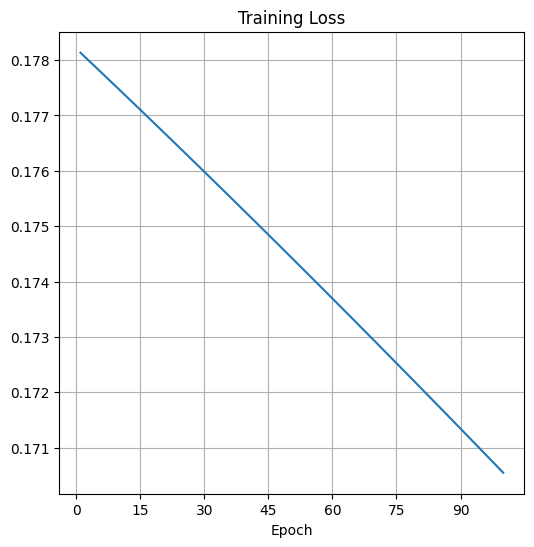

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn import datasets

X, Y = datasets.load_iris(return_X_y = True)
X, Y = X[:100, :2], Y[:100]
rng = np.random.default_rng(2)
indices = [i for i in range(100)]
rng.shuffle(indices)
X, Y = X[indices], Y[indices]


# assemble your model
model = Network([Layer(2, 4), Layer(4, 1)],
                [sigmoid, sigmoid],
                [d_sigmoid, d_sigmoid],
                l2_loss, d_l2_loss)

# specify training parameters
epochs = 100
learning_rate = 1e-2
reg_lambda = 0

loss = model.fit(X, Y, epochs, learning_rate, reg_lambda)

# plot the losses, the curve should be decreasing
fig, ax = plt.subplots(figsize = (6, 6))
ax.plot([i + 1 for i in range(epochs)], loss)
ax.set_title("Training Loss")
ax.set_xlabel("Epoch")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True)
plt.show()


## Q3: Real Data Experiments

In this part, you need to try out different model parameter values and observe how they affect the results.

For each of the questions below, implement experiments and insert performance scores to the designated dictionary. The performance scores can be computed using the imported functions (for F1 score, you need to specify `average = "macro"` when calling the function). You can refer to Q2.4 as an example of implementing experiments.

**Note**: Remember to initialize a new instance of your model for each different choice of hyper-parameter.

A zip file with the the data is at https://drive.google.com/file/d/1tt3zRxi5AFWEPsCXQAeSDiV-nAY3cdo2/view?usp=share_link.

### Q3.0: Loading Data

Modify the "data_dir" variable in the following block and run the cell to load the data. Since the provided dataset contains more than two labels, both "YTrain" and "YTest" have been converted to one-hot forms.

**Note**: Be careful about the shapes of the data variables. Specifically, the one-hot encoded labels are **row vectors**.

In [7]:
import pandas
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

data_dir = "" # input the path to "dataset" directory
df_X_train = pandas.read_csv(os.path.join(data_dir, "Digit_X_train.csv"), header = None)
df_X_test = pandas.read_csv(os.path.join(data_dir, "Digit_X_test.csv"), header = None)
df_y_train = pandas.read_csv(os.path.join(data_dir, "Digit_y_train.csv"), header = None)
df_y_test = pandas.read_csv(os.path.join(data_dir, "Digit_y_test.csv"), header = None)
XTrain, XTest = df_X_train.values, df_X_test.values
YTrain, YTest = df_y_train.values, df_y_test.values
print("All labels: " + str(np.unique(YTrain)))

# encode multi-class labels
encoder = OneHotEncoder(sparse_output = False)
YTrain_encoded = encoder.fit_transform(YTrain)
YTest_encoded = encoder.transform(YTest)

print("XTrain.shape = " + str(XTrain.shape))
print("XTest.shape = " + str(XTest.shape))
print("YTrain.shape = " + str(YTrain.shape))
print("YTrain_encoded.shape = " + str(YTrain_encoded.shape))
print("YTest.shape  " + str(YTest.shape))
print("YTest_encoded.shape  " + str(YTest_encoded.shape))

All labels: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
XTrain.shape = (898, 64)
XTest.shape = (899, 64)
YTrain.shape = (898, 1)
YTrain_encoded.shape = (898, 10)
YTest.shape  (899, 1)
YTest_encoded.shape  (899, 10)


### Q3.1: Epochs

Experiment with **five** different choices of total epochs.

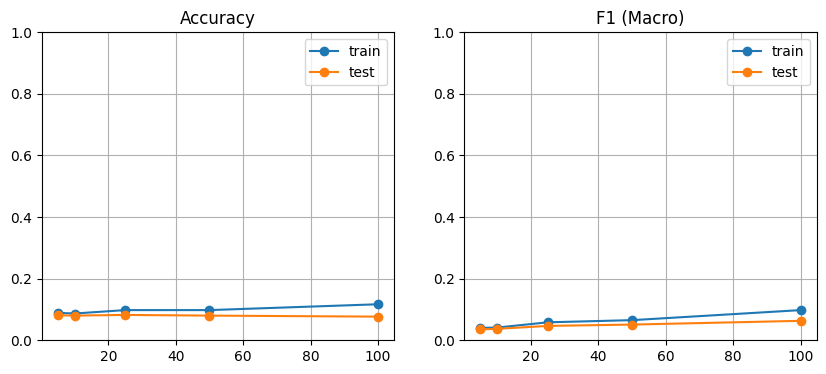

In [12]:
scores_train = {"Accuracy" : [], "F1 (Macro)" : []}
scores_test = {"Accuracy" : [], "F1 (Macro)" : []}

############################## start of your code ##############################
epochs_list = [5, 10, 25, 50, 100] # fill the list with your five epoch choices in increasing order

# implement experiments and fill the lists in "scores_train" and
# "scores_test" (one entry per epoch value)
for num_epochs in epochs_list:
    # assemble your model (using cross-entropy and softmax for multi-class)
    model = Network([Layer(XTrain.shape[1], 64), Layer(64, YTrain_encoded.shape[1])],
                    [sigmoid, softmax],
                    [d_sigmoid, d_cross_entropy_softmax],
                    cross_entropy_loss, d_cross_entropy_softmax)

    # specify training parameters
    learning_rate = 1e-2
    reg_lambda = 0

    # train the model
    model.fit(XTrain, YTrain_encoded, num_epochs, learning_rate, reg_lambda)

    # make predictions
    YTrain_pred_encoded = model.predict(XTrain)
    YTest_pred_encoded = model.predict(XTest)

    # convert predictions back to original labels for scoring
    YTrain_pred = encoder.inverse_transform(np.eye(YTrain_encoded.shape[1])[YTrain_pred_encoded]).flatten()
    YTest_pred = encoder.inverse_transform(np.eye(YTest_encoded.shape[1])[YTest_pred_encoded]).flatten()


    # calculate and store scores
    scores_train["Accuracy"].append(accuracy_score(YTrain, YTrain_pred))
    scores_train["F1 (Macro)"].append(f1_score(YTrain, YTrain_pred, average = "macro"))
    scores_test["Accuracy"].append(accuracy_score(YTest, YTest_pred))
    scores_test["F1 (Macro)"].append(f1_score(YTest, YTest_pred, average = "macro"))

epochs = epochs_list # assign the epochs list to the variable used for plotting
############################### end of your code ###############################

fig, axes = plt.subplots(1, 2, figsize = (10, 4))
for i, key in enumerate(["Accuracy", "F1 (Macro)"]):
    axes[i].plot(epochs, scores_train[key], "-o", label = "train")
    axes[i].plot(epochs, scores_test[key], "-o", label = "test")
    axes[i].set_title(key)
    axes[i].set_ylim([0, 1])
    axes[i].legend()
    axes[i].grid(True)
plt.show()

### Q3.2: Learning Rate

Experiment with **five** different choices of learning rates.

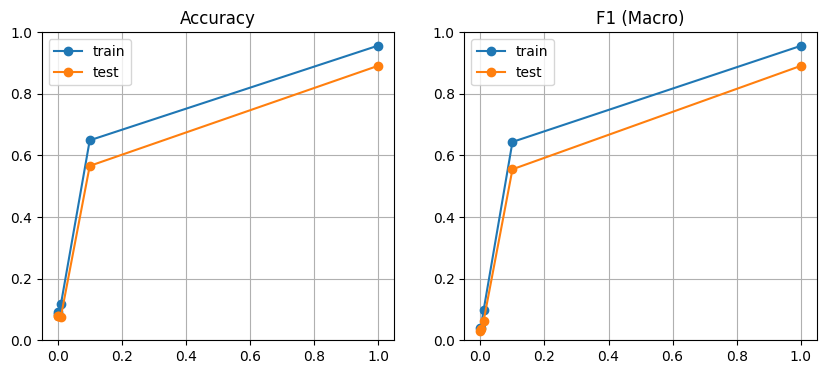

In [13]:
scores_train = {"Accuracy" : [], "F1 (Macro)" : []}
scores_test = {"Accuracy" : [], "F1 (Macro)" : []}

############################## start of your code ##############################
LRs = [1e-4, 1e-3, 1e-2, 1e-1, 1.0] # fill the list with your five LR choices in increasing order

# implement experiments and fill the lists in "scores_train" and
# "scores_test" (one entry per LR value)
for learning_rate in LRs:
    # assemble your model (using cross-entropy and softmax for multi-class)
    model = Network([Layer(XTrain.shape[1], 64), Layer(64, YTrain_encoded.shape[1])],
                    [sigmoid, softmax],
                    [d_sigmoid, d_cross_entropy_softmax],
                    cross_entropy_loss, d_cross_entropy_softmax)

    # specify training parameters
    epochs = 100 # Using a fixed number of epochs for this experiment
    reg_lambda = 0

    # train the model
    model.fit(XTrain, YTrain_encoded, epochs, learning_rate, reg_lambda)

    # make predictions
    YTrain_pred_encoded = model.predict(XTrain)
    YTest_pred_encoded = model.predict(XTest)

    # convert predictions back to original labels for scoring
    YTrain_pred = encoder.inverse_transform(np.eye(YTrain_encoded.shape[1])[YTrain_pred_encoded]).flatten()
    YTest_pred = encoder.inverse_transform(np.eye(YTest_encoded.shape[1])[YTest_pred_encoded]).flatten()

    # calculate and store scores
    scores_train["Accuracy"].append(accuracy_score(YTrain, YTrain_pred))
    scores_train["F1 (Macro)"].append(f1_score(YTrain, YTrain_pred, average = "macro"))
    scores_test["Accuracy"].append(accuracy_score(YTest, YTest_pred))
    scores_test["F1 (Macro)"].append(f1_score(YTest, YTest_pred, average = "macro"))

############################### end of your code ###############################

fig, axes = plt.subplots(1, 2, figsize = (10, 4))
for i, key in enumerate(["Accuracy", "F1 (Macro)"]):
    axes[i].plot(LRs, scores_train[key], "-o", label = "train")
    axes[i].plot(LRs, scores_test[key], "-o", label = "test")
    axes[i].set_title(key)
    axes[i].set_ylim([0, 1])
    axes[i].legend()
    axes[i].grid(True)
plt.show()

### Q3.3: Regularization Parameter

Experiment with **five** different choices of regularization parameter.

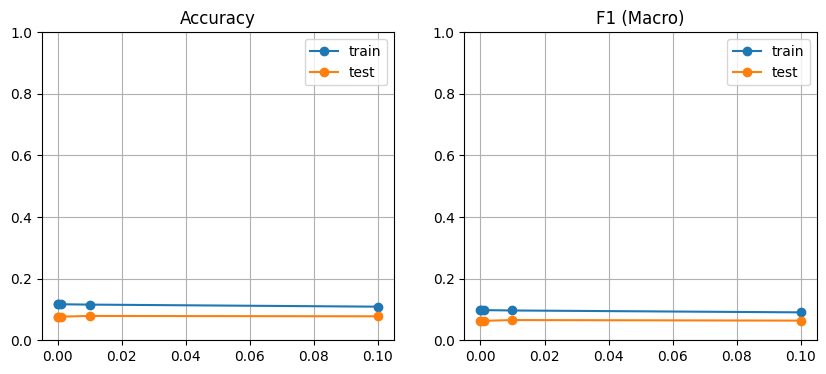

In [14]:
scores_train = {"Accuracy" : [], "F1 (Macro)" : []}
scores_test = {"Accuracy" : [], "F1 (Macro)" : []}

############################## start of your code ##############################
lambdas = [0.0, 1e-4, 1e-3, 1e-2, 1e-1] # fill the list with your five regularization lambda choices in increasing order

# implement experiments and fill the lists in "scores_train" and
# "scores_test" (one entry per reg_lambda value)
for reg_lambda in lambdas:
    # assemble your model (using cross-entropy and softmax for multi-class)
    model = Network([Layer(XTrain.shape[1], 64), Layer(64, YTrain_encoded.shape[1])],
                    [sigmoid, softmax],
                    [d_sigmoid, d_cross_entropy_softmax],
                    cross_entropy_loss, d_cross_entropy_softmax)

    # specify training parameters
    epochs = 100 # Using a fixed number of epochs and learning rate for this experiment
    learning_rate = 1e-2

    # train the model
    model.fit(XTrain, YTrain_encoded, epochs, learning_rate, reg_lambda)

    # make predictions
    YTrain_pred_encoded = model.predict(XTrain)
    YTest_pred_encoded = model.predict(XTest)

    # convert predictions back to original labels for scoring
    YTrain_pred = encoder.inverse_transform(np.eye(YTrain_encoded.shape[1])[YTrain_pred_encoded]).flatten()
    YTest_pred = encoder.inverse_transform(np.eye(YTest_encoded.shape[1])[YTest_pred_encoded]).flatten()

    # calculate and store scores
    scores_train["Accuracy"].append(accuracy_score(YTrain, YTrain_pred))
    scores_train["F1 (Macro)"].append(f1_score(YTrain, YTrain_pred, average = "macro"))
    scores_test["Accuracy"].append(accuracy_score(YTest, YTest_pred))
    scores_test["F1 (Macro)"].append(f1_score(YTest, YTest_pred, average = "macro"))
############################### end of your code ###############################

fig, axes = plt.subplots(1, 2, figsize = (10, 4))
for i, key in enumerate(["Accuracy", "F1 (Macro)"]):
    axes[i].plot(lambdas, scores_train[key], "-o", label = "train")
    axes[i].plot(lambdas, scores_test[key], "-o", label = "test")
    axes[i].set_title(key)
    axes[i].set_ylim([0, 1])
    axes[i].legend()
    axes[i].grid(True)
plt.show()

### Q3.4: Network Structure

Experiment with **five** different choices of network structure. This includes number of layers and number of nodes in each layer.

*Hint*: Try experimenting with increasing complexity. You may need to hard-code the experiments without using a for loop.


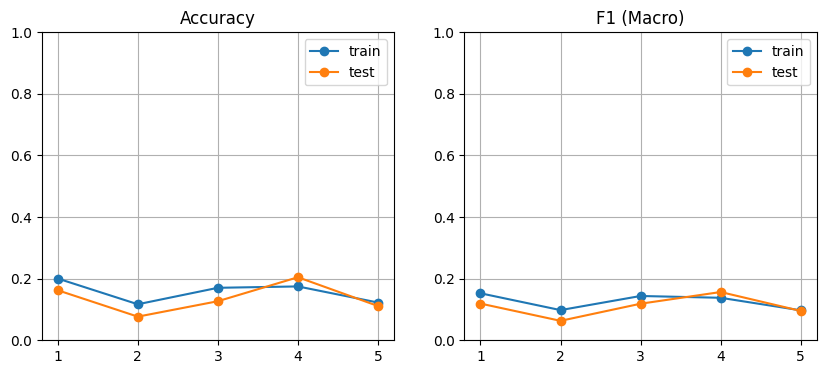

In [15]:
levels = [1, 2, 3, 4, 5]
scores_train = {"Accuracy" : [], "F1 (Macro)" : []}
scores_test = {"Accuracy" : [], "F1 (Macro)" : []}

############################## start of your code ##############################
# implement experiments and fill the lists in "scores_train" and
# "scores_test" (one entry per complexity level)

# Experiment 1: 1 hidden layer with 32 nodes
model1 = Network([Layer(XTrain.shape[1], 32), Layer(32, YTrain_encoded.shape[1])],
                 [sigmoid, softmax],
                 [d_sigmoid, d_cross_entropy_softmax],
                 cross_entropy_loss, d_cross_entropy_softmax)
model1.fit(XTrain, YTrain_encoded, epochs=100, learning_rate=1e-2, reg_lambda=0)
YTrain_pred1 = encoder.inverse_transform(np.eye(YTrain_encoded.shape[1])[model1.predict(XTrain)]).flatten()
YTest_pred1 = encoder.inverse_transform(np.eye(YTest_encoded.shape[1])[model1.predict(XTest)]).flatten()
scores_train["Accuracy"].append(accuracy_score(YTrain, YTrain_pred1))
scores_train["F1 (Macro)"].append(f1_score(YTrain, YTrain_pred1, average = "macro"))
scores_test["Accuracy"].append(accuracy_score(YTest, YTest_pred1))
scores_test["F1 (Macro)"].append(f1_score(YTest, YTest_pred1, average = "macro"))

# Experiment 2: 1 hidden layer with 64 nodes (already done in previous questions, but repeating for consistency)
model2 = Network([Layer(XTrain.shape[1], 64), Layer(64, YTrain_encoded.shape[1])],
                 [sigmoid, softmax],
                 [d_sigmoid, d_cross_entropy_softmax],
                 cross_entropy_loss, d_cross_entropy_softmax)
model2.fit(XTrain, YTrain_encoded, epochs=100, learning_rate=1e-2, reg_lambda=0)
YTrain_pred2 = encoder.inverse_transform(np.eye(YTrain_encoded.shape[1])[model2.predict(XTrain)]).flatten()
YTest_pred2 = encoder.inverse_transform(np.eye(YTest_encoded.shape[1])[model2.predict(XTest)]).flatten()
scores_train["Accuracy"].append(accuracy_score(YTrain, YTrain_pred2))
scores_train["F1 (Macro)"].append(f1_score(YTrain, YTrain_pred2, average = "macro"))
scores_test["Accuracy"].append(accuracy_score(YTest, YTest_pred2))
scores_test["F1 (Macro)"].append(f1_score(YTest, YTest_pred2, average = "macro"))

# Experiment 3: 2 hidden layers with 64 and 32 nodes
model3 = Network([Layer(XTrain.shape[1], 64), Layer(64, 32), Layer(32, YTrain_encoded.shape[1])],
                 [sigmoid, sigmoid, softmax],
                 [d_sigmoid, d_sigmoid, d_cross_entropy_softmax],
                 cross_entropy_loss, d_cross_entropy_softmax)
model3.fit(XTrain, YTrain_encoded, epochs=100, learning_rate=1e-2, reg_lambda=0)
YTrain_pred3 = encoder.inverse_transform(np.eye(YTrain_encoded.shape[1])[model3.predict(XTrain)]).flatten()
YTest_pred3 = encoder.inverse_transform(np.eye(YTest_encoded.shape[1])[model3.predict(XTest)]).flatten()
scores_train["Accuracy"].append(accuracy_score(YTrain, YTrain_pred3))
scores_train["F1 (Macro)"].append(f1_score(YTrain, YTrain_pred3, average = "macro"))
scores_test["Accuracy"].append(accuracy_score(YTest, YTest_pred3))
scores_test["F1 (Macro)"].append(f1_score(YTest, YTest_pred3, average = "macro"))

# Experiment 4: 2 hidden layers with 128 and 64 nodes
model4 = Network([Layer(XTrain.shape[1], 128), Layer(128, 64), Layer(64, YTrain_encoded.shape[1])],
                 [sigmoid, sigmoid, softmax],
                 [d_sigmoid, d_sigmoid, d_cross_entropy_softmax],
                 cross_entropy_loss, d_cross_entropy_softmax)
model4.fit(XTrain, YTrain_encoded, epochs=100, learning_rate=1e-2, reg_lambda=0)
YTrain_pred4 = encoder.inverse_transform(np.eye(YTrain_encoded.shape[1])[model4.predict(XTrain)]).flatten()
YTest_pred4 = encoder.inverse_transform(np.eye(YTest_encoded.shape[1])[model4.predict(XTest)]).flatten()
scores_train["Accuracy"].append(accuracy_score(YTrain, YTrain_pred4))
scores_train["F1 (Macro)"].append(f1_score(YTrain, YTrain_pred4, average = "macro"))
scores_test["Accuracy"].append(accuracy_score(YTest, YTest_pred4))
scores_test["F1 (Macro)"].append(f1_score(YTest, YTest_pred4, average = "macro"))

# Experiment 5: 3 hidden layers with 128, 64, and 32 nodes
model5 = Network([Layer(XTrain.shape[1], 128), Layer(128, 64), Layer(64, 32), Layer(32, YTrain_encoded.shape[1])],
                 [sigmoid, sigmoid, sigmoid, softmax],
                 [d_sigmoid, d_sigmoid, d_sigmoid, d_cross_entropy_softmax],
                 cross_entropy_loss, d_cross_entropy_softmax)
model5.fit(XTrain, YTrain_encoded, epochs=100, learning_rate=1e-2, reg_lambda=0)
YTrain_pred5 = encoder.inverse_transform(np.eye(YTrain_encoded.shape[1])[model5.predict(XTrain)]).flatten()
YTest_pred5 = encoder.inverse_transform(np.eye(YTest_encoded.shape[1])[model5.predict(XTest)]).flatten()
scores_train["Accuracy"].append(accuracy_score(YTrain, YTrain_pred5))
scores_train["F1 (Macro)"].append(f1_score(YTrain, YTrain_pred5, average = "macro"))
scores_test["Accuracy"].append(accuracy_score(YTest, YTest_pred5))
scores_test["F1 (Macro)"].append(f1_score(YTest, YTest_pred5, average = "macro"))

############################### end of your code ##############################

fig, axes = plt.subplots(1, 2, figsize = (10, 4))
for i, key in enumerate(["Accuracy", "F1 (Macro)"]):
    axes[i].plot(levels, scores_train[key], "-o", label = "train")
    axes[i].plot(levels, scores_test[key], "-o", label = "test")
    axes[i].set_title(key)
    axes[i].set_ylim([0, 1])
    axes[i].legend()
    axes[i].grid(True)
plt.show()